In [1]:
import tensorflow as tf
import glob
import random
import pathlib
import numpy
import os
import matplotlib
from matplotlib import pyplot as plt
import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [2]:
cat=glob.glob('D:/mydata/dc/train/cat.*?.jpg')
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
dog=glob.glob('D:/mydata/dc/train/dog.*?.jpg')

In [5]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
all_img_list=cat[0:3000]+dog[0:3000]
random.shuffle(all_img_list)
len(all_img_list)

6000

In [7]:
name=['dog','cat']
name_index=dict((name, index) for index,name in enumerate(name))
name_index

{'dog': 0, 'cat': 1}

In [8]:
d='D:/mydata/dc/train\\dog.1465.jpg'
d.split('.')[0].split('\\')[1]

'dog'

In [9]:
def kill(path):
    d=path
    c=d.split('.')[0].split('\\')[1]
    return c

In [10]:
ds=map(kill,all_img_list)
all_img_name=[name_index[i]for i in ds]
all_img_name

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [11]:
def load_preprosess_image(path,lenbers):
    imgs=tf.io.read_file(path)#用TensorFlow读取图片
    imgs=tf.image.decode_jpeg(imgs,channels=3)#解码读取的图片
    imgs=tf.image.resize(imgs,[256,256])#规定图片的大小，裁剪格式
    imgs=tf.cast(imgs,tf.float32)#把图片解析成数组
    imgs=imgs/255    #让解析出来的数组归一化
    lenbers=tf.reshape(lenbers,[1])
    return imgs,lenbers

In [12]:
data_all_list=tf.data.Dataset.from_tensor_slices((all_img_list,all_img_name))
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_all_list=data_all_list.map(load_preprosess_image,num_parallel_calls=AUTOTUNE)
data_all_list

<ParallelMapDataset shapes: ((256, 256, 3), (1,)), types: (tf.float32, tf.int32)>

In [13]:
tain_datas=data_all_list.take(len(all_img_list))
tain_data=tain_datas.repeat().shuffle(buffer_size=len(all_img_list)).batch(5)

In [14]:
datas=keras.applications.xception.Xception(weights='imagenet',
                                             include_top=False,
                                             input_shape=(256,256,3),
                                             pooling='avg')

In [15]:
datas.trainable=False

In [18]:
model=keras.Sequential()
model.add(datas)
model.add(tf.keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 21,911,081
Trainable params: 1,049,601
Non-trainable params: 20,861,480
_________________________________________________________________


In [20]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [21]:
nums=len(all_img_list)//20

In [22]:
tf.keras.backend.clear_session()

In [24]:
model.fit(tain_data,epochs=5,steps_per_epoch=nums)

Epoch 1/5
300/300 [==============================] - 16s 55ms/step - loss: 0.0876 - acc: 0.9753
Epoch 2/5
300/300 [==============================] - 16s 54ms/step - loss: 0.0305 - acc: 0.9900
Epoch 3/5
300/300 [==============================] - 16s 55ms/step - loss: 0.0417 - acc: 0.9907
Epoch 4/5
300/300 [==============================] - 16s 54ms/step - loss: 0.0341 - acc: 0.9913
Epoch 5/5
300/300 [==============================] - 16s 53ms/step - loss: 0.0354 - acc: 0.9920


In [24]:
history=model.history

In [25]:
history.history.keys()

dict_keys(['loss', 'acc'])

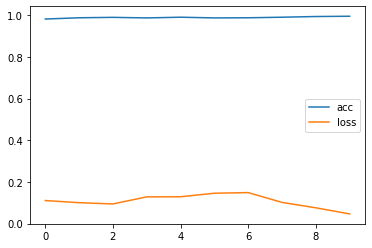

In [26]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.legend()

In [27]:
test=glob.glob('D:mydata/dc/test/[1][0-9].jpg')
test

['D:mydata/dc/test\\10.jpg',
 'D:mydata/dc/test\\11.jpg',
 'D:mydata/dc/test\\12.jpg',
 'D:mydata/dc/test\\13.jpg',
 'D:mydata/dc/test\\14.jpg',
 'D:mydata/dc/test\\15.jpg',
 'D:mydata/dc/test\\16.jpg',
 'D:mydata/dc/test\\17.jpg',
 'D:mydata/dc/test\\18.jpg',
 'D:mydata/dc/test\\19.jpg']

In [32]:
def dclist(paths):
    img=tf.io.read_file(paths)
    img=tf.image.decode_jpeg(img,channels=3)
    img=tf.image.resize(img,[256,256])
    img=tf.cast(img,tf.float32)
    img=img/255
    return img

In [33]:
test_list=tf.data.Dataset.from_tensor_slices(test)
test_list=test_list.map(dclist)
test_list=test_list.batch(16)

In [36]:
tf.keras.backend.clear_session()

In [37]:
data=model.predict(test_list)

ResourceExhaustedError:  OOM when allocating tensor with shape[10,128,125,125] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential/xception/block2_sepconv1/separable_conv2d (defined at <ipython-input-34-42a9e92fb2b6>:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_predict_function_17293]

Function call stack:
predict_function


In [31]:
for i in data:
    print('%.3f'%i)

4.149
9.069
0.000
8.047
3.853
8.580
9.643
0.000
0.000
8.325
